In [28]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)

import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Video Games Sales.csv")
df.head()
df.columns

Index(['index', 'Rank', 'Game Title', 'Platform', 'Year', 'Genre', 'Publisher',
       'North America', 'Europe', 'Japan', 'Rest of World', 'Global',
       'Review'],
      dtype='object')

In [14]:
df = df.dropna()

In [23]:
df.isnull().sum()

index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
Hit              0
dtype: int64

In [44]:
# define Hit correctly (based on Review ≥ 75)
df["Hit"] = (df["Review"] >= 75).astype(int)

# See how many hits vs non-hits
df["Hit"].value_counts()

Hit
1    1392
0     486
Name: count, dtype: int64

In [25]:
df.columns

Index(['index', 'Rank', 'Game Title', 'Platform', 'Year', 'Genre', 'Publisher',
       'North America', 'Europe', 'Japan', 'Rest of World', 'Global', 'Review',
       'Hit'],
      dtype='object')

In [45]:
# the features we’ll use
feature_cols = [
    "Platform",
    "Genre",
    "Publisher",
    "Year",
    "North America",
    "Europe",
    "Japan",
    "Rest of World",
    "Global"
]

In [38]:
# Drop rows that are missing any of these
model_df = df[feature_cols + ["Hit"]].dropna()

X = model_df[feature_cols]
y = model_df["Hit"]

In [39]:
# Turn categorical columns into numbers (one-hot encoding)
X_encoded = pd.get_dummies(X, columns=["Platform", "Genre", "Publisher"], drop_first=True)

print(X_encoded.shape)   # just to see how many columns we now have

(1878, 131)


In [40]:
# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [48]:
# Fit Logistic Regression
log_reg = LogisticRegression(
    max_iter=2000,
    solver="liblinear",
    class_weight="balanced"
)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, solver='liblinear')

In [49]:
# Evaluate: accuracy, confusion matrix, precision/recall/F1
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.726063829787234

Confusion Matrix:
 [[ 66  31]
 [ 72 207]]

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.68      0.56        97
           1       0.87      0.74      0.80       279

    accuracy                           0.73       376
   macro avg       0.67      0.71      0.68       376
weighted avg       0.77      0.73      0.74       376



ROC-AUC: 0.7838377120053209


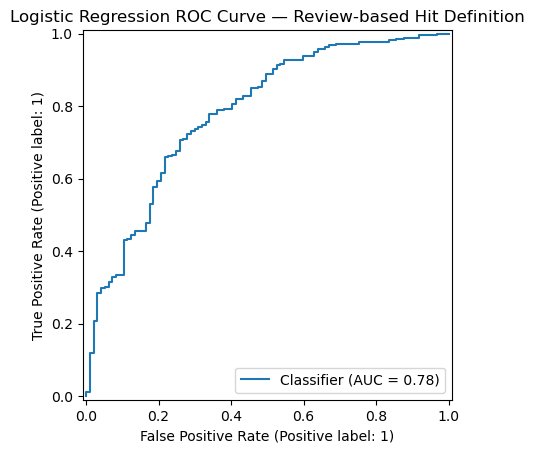

In [50]:
# ROC–AUC and curve
y_proba = log_reg.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("Logistic Regression ROC Curve — Review-based Hit Definition")
plt.show()